## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [1]:
#setup
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data import
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# model setup
batch_size = 128
num_classes = 10
epochs = 20


60000 train samples
10000 test samples


In [3]:
#build model

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

C:\Users\rober\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#add noise
np.random.seed(15)
noise_feat = np.linspace(.1, 1.0, 10)
np.random.shuffle(noise_feat)
feat_img = {i: noise_feat[i] for i in range(10)}
x_train_noise = []
x_test_noise = []
#noise for train
for i in range(len(x_train)):
    class_lab = y_train[i]
    noise_scale = feat_img[class_lab]
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=x_train[i].shape)
    img = np.clip(x_train[i] + noise, 0., 1.)
    x_train_noise.append(img)
#noise for test
for i in range(len(x_test)):
    class_lab = y_test[i]
    noise_scale = feat_img[class_lab]
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=x_test[i].shape)
    img = np.clip(x_test[i] + noise, 0., 1.)
    x_test_noise.append(img)

x_train_noise = np.array(x_train_noise)
x_test_noise = np.array(x_test_noise)

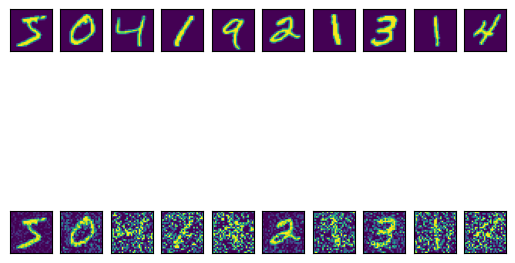

In [5]:
#compare plots with noise
plt.figure()
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(x_train_noise[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#### Train Data (no noise)

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
history_orig = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8648 - loss: 0.4566 - val_accuracy: 0.9671 - val_loss: 0.1047
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9659 - loss: 0.1071 - val_accuracy: 0.9754 - val_loss: 0.0850
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9774 - loss: 0.0713 - val_accuracy: 0.9785 - val_loss: 0.0701
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0543 - val_accuracy: 0.9783 - val_loss: 0.0702
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0454 - val_accuracy: 0.9796 - val_loss: 0.0724
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9800 - val_loss: 0.0695
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9898 - loss: 0.0304 - val_accuracy: 0.9811 - val_loss: 0.0657
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9893 - loss: 0.0305 - val_accuracy: 0.

#### Train Data (w/ noise)

In [8]:
history2 = model.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test))
score2 = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8310 - loss: 0.5252 - val_accuracy: 0.9288 - val_loss: 0.2050
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9334 - loss: 0.1852 - val_accuracy: 0.9354 - val_loss: 0.1841
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9501 - loss: 0.1333 - val_accuracy: 0.9420 - val_loss: 0.1743
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9642 - loss: 0.1014 - val_accuracy: 0.9410 - val_loss: 0.1756
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9697 - loss: 0.0837 - val_accuracy: 0.9439 - val_loss: 0.1738
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9762 - loss: 0.0662 - val_accuracy: 0.9399 - val_loss: 0.1913
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0556 - val_accuracy: 0.9379 - val_loss: 0.2074
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0462 - val_accuracy: 0.

#### Comparison

In [9]:
print('Test loss:', score[0], 'Test loss with Noise:', score2[0])
print('Test accuracy:', score[1], 'Test accuracy with Noise:', score2[1])

Test loss: 0.08255087584257126 Test loss with Noise: 0.2975553274154663
Test accuracy: 0.9836000204086304 Test accuracy with Noise: 0.9395999908447266


## 3. Vary the amount of noise by changing the scale parameter in np.random.normal by a factor. Use .1, .5, 1.0, 2.0, 4.0 for the scale and keep track of the accuracy for training and validation and plot these results

In [10]:
##Build Models

def noise_test(df, scale):
    noise = np.random.normal(loc=0.0, scale=scale, size=df.shape)
    df_noise = df + noise
    return np.clip(df_noise, 0., 1.)

def mlnn():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

def eval(x_train, y_train, x_test, y_test, scale):
    x_train_noise = noise_test(x_train, scale)
    t_test_noise = noise_test(x_test, scale)

    model = mlnn()
    history = model.fit(x_train_noise, y_train,
                        epochs = 20,
                        batch_size = 128,
                        validation_data=(x_test_noise, y_test),
                        verbose = 0)
    return history

#Citation: OpenAI (2024). ChatGPT. Retrieved from: openai.chatgpt.com

In [11]:
#test
noise_scale = [0.1, 0.5, 1.0, 2.0, 4.0]
histories = {}

for scale in noise_scale:
    print(f'Training Noise Scale: {scale}')
    histories[scale] = eval(x_train, y_train, x_test, y_test, scale)

Training Noise Scale: 0.1
Training Noise Scale: 0.5
Training Noise Scale: 1.0
Training Noise Scale: 2.0
Training Noise Scale: 4.0


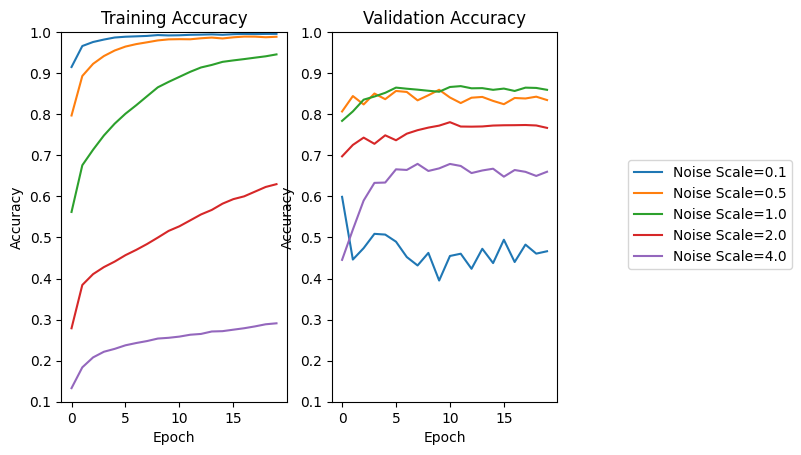

In [12]:
#plot for training and validation
fig, axs = plt.subplots(1, 2)

for scale, history in histories.items():
    axs[0].plot(history.history['accuracy'], label=f'Noise Scale={scale}')

axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')

for scale, history in histories.items():
    axs[1].plot(history.history['val_accuracy'])

axs[1].set_title('Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

axs[0].set_ylim(0.1, 1.0)
axs[1].set_ylim(0.1, 1.0)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()